<a href="https://colab.research.google.com/github/sul0211/SyamsulBuchoriPane_JS1/blob/main/reading_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpg
import matplotlib.pyplot as plt
from geopandas import datasets, read_file, GeoDataFrame

In [5]:
zipfile = "lsm.zip"
kota= gpg.read_file(zipfile)

In [6]:
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327..."
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845..."
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349..."
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612..."


In [7]:
pip install mapclassify

In [8]:
import mapclassify
kota.explore(column='NAMOBJ',
             tooltip='NAMOBJ', popup=True,
             tiles='CartoDB positron', cmap='Set1',style_kwds=dict(color='black') )

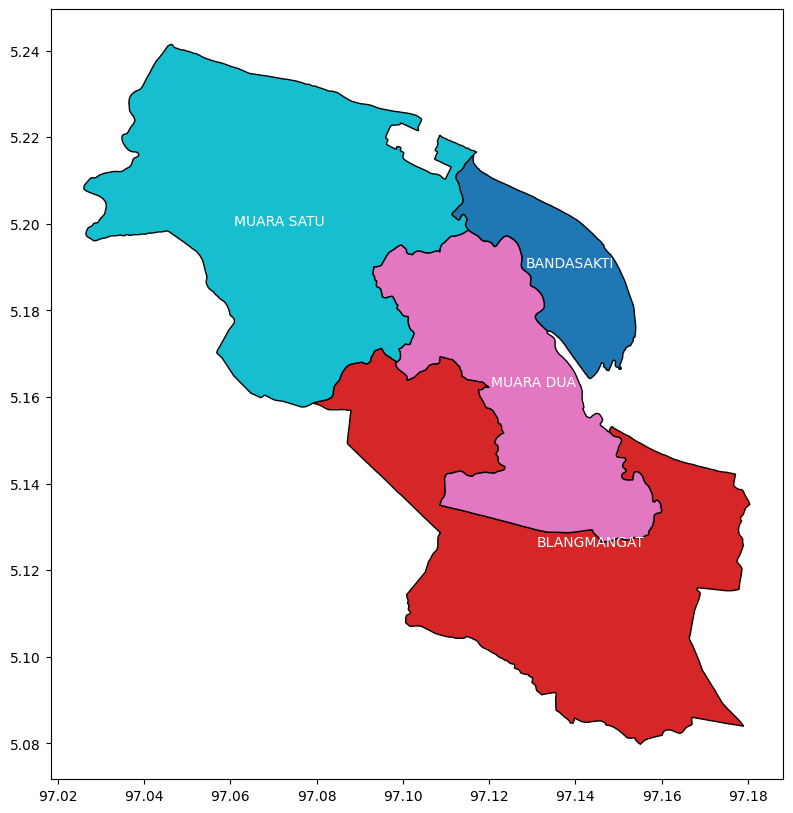

In [9]:
kota["coords"] = kota["geometry"].apply(lambda x: x.representative_point().coords[:])
kota["coords"] = [coords[0] for coords in kota["coords"]]
fig, ax = plt.subplots(figsize = (10,10))
kota.plot(ax=ax,   column="NAMOBJ", categorical=True,edgecolor="black", )
for idx, row in kota.iterrows():
   plt.annotate(text=row["NAMOBJ"], xy=row["coords"], horizontalalignment="center", color="white")

In [36]:
import pandas as pd
dt=pd.read_excel('sigr.xlsx')

In [37]:
dt.head()

,NAMOBJ,PENDAPATAN
0,BANDASAKTI,8099
1,BLANGMANGAT,998
2,MUARA DUA,90
3,MUARA SATU,98


In [30]:
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry,coords
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327...","(97.13878000112307, 5.189917107000072)"
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845...","(97.14351442874542, 5.125539651000041)"
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349...","(97.13039716440599, 5.162575218500029)"
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612...","(97.07127646868163, 5.1996040400000805)"


,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry,coords
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327...","(97.13878000112307, 5.189917107000072)"
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845...","(97.14351442874542, 5.125539651000041)"
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349...","(97.13039716440599, 5.162575218500029)"
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612...","(97.07127646868163, 5.1996040400000805)"


In [38]:
kota1=kota.merge(dt,on='NAMOBJ')
kota1.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry,coords,PENDAPATAN
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327...","(97.13878000112307, 5.189917107000072)",8099
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845...","(97.14351442874542, 5.125539651000041)",998
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349...","(97.13039716440599, 5.162575218500029)",90
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612...","(97.07127646868163, 5.1996040400000805)",98
